In [1]:
import par_init as par
import load as ld
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wdg
import user_functions as usr
yrs = 24*3600*365
pc = 3.24078e-19
kpc = 3.24078e-19/1000

In [2]:
ene = np.logspace(0, 12, 1E3)
ion = []
pl = []
syn = []
bre = []
ic = []
for i in ene:
    ion.append(par.eloss_rate(i, 1, 0, 0.1, 0, 0, 10, 8000)[0])
    pl.append(abs(par.eloss_rate(i, 1, 0, .1, 0, 0, 10, 8000)[1]))
    syn.append(par.eloss_rate(i, 1, 0, 0.1, 0, 0, 10, 8000)[2])
    bre.append(par.eloss_rate(i, 1, 0, 0.1, 0, 0, 10, 8000)[3])
    ic.append(par.eloss_rate(i, 1, 0, 0.1, 0, 0, 10, 8000)[4])

/anaconda2/envs/three/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


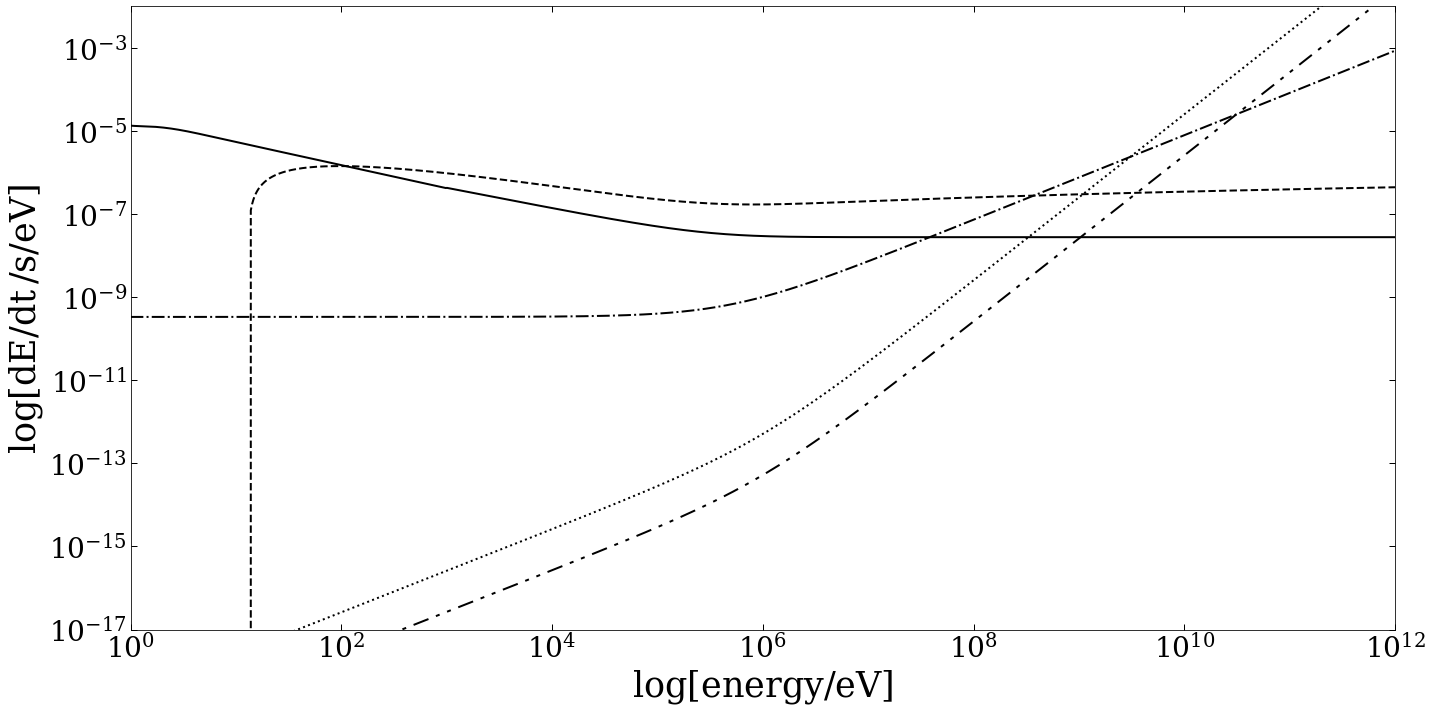

In [3]:
plt.figure(figsize = (20,10))
plt.plot(ene, pl, 'k-',lw = 2 ,label = '$\mathrm{Plasma}$')
plt.plot(ene, ion, 'k--', lw = 2 ,label = '$\mathrm{Ionization}$')
plt.plot(ene, syn, 'k:',lw = 2 ,label = '$\mathrm{Synchrotron\,(10\mu G)}$')
plt.plot(ene, bre, 'k-', lw = 2 ,linestyle='dashdot',label = '$\mathrm{Bremsstrahlung\,(total)}$')
line, = plt.plot(ene, ic, 'k-', lw = 2 ,label = '$\mathrm{Inverse\,Compton}$')
line.set_dashes([8, 4, 2, 4, 2, 4])
plt.ylim([1E-17, 1E-2])
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=28)
plt.xlabel('$\log[\mathrm{energy/eV}]$', fontsize=35)
plt.ylabel('$\log[dE/dt\,/\mathrm{s/eV}]$', fontsize=35)
plt.show()


In [4]:
ion_loss = []
pl_loss = []
syn_loss = []
bre_loss = []
ic_loss = []
for i in ene:
    ion_loss.append(i/(par.eloss_rate(i, 1, 0, 0.1, 0, 0, 10, 8000)[0]*(365*24*3600)))
    pl_loss.append(i/abs(par.eloss_rate(i, 1, 0, .1, 0, 0, 10, 8000)[1]*(365*24*3600)))
    syn_loss.append(i/(par.eloss_rate(i, 1, 0, 0.1, 0, 0, 10, 8000)[2]*(365*24*3600)))
    bre_loss.append(i/(par.eloss_rate(i, 1, 0, 0.1, 0, 0, 10, 8000)[3]*(365*24*3600)))
    ic_loss.append(i/(par.eloss_rate(i, 1, 0, 0.1, 0, 0, 10, 8000)[4]*(365*24*3600)))

/anaconda2/envs/three/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


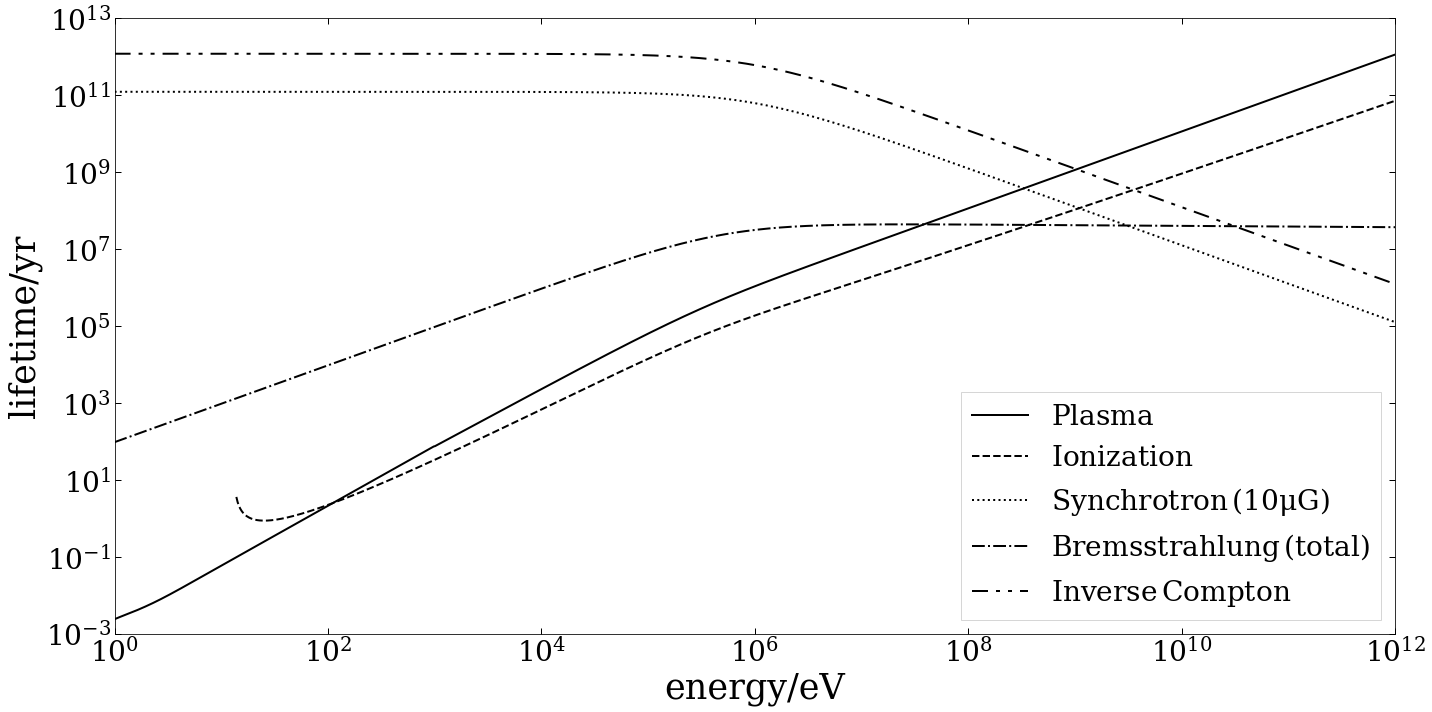

In [5]:


plt.figure(figsize = (20,10))
plt.plot(ene, pl_loss, 'k-',lw = 2 ,label = '$\mathrm{Plasma}$')
plt.plot(ene, ion_loss, 'k--', lw = 2 ,label = '$\mathrm{Ionization}$')
plt.plot(ene, syn_loss, 'k:',lw = 2 ,label = '$\mathrm{Synchrotron\,(10\mu G)}$')
plt.plot(ene, bre_loss, 'k-', lw = 2 ,linestyle='dashdot',label = '$\mathrm{Bremsstrahlung\,(total)}$')
line, = plt.plot(ene, ic_loss, 'k-', lw = 2 ,label = '$\mathrm{Inverse\,Compton}$')
line.set_dashes([8, 4, 2, 4, 2, 4])
#plt.ylim([1E-17, 1E-2])
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=28)
plt.xlabel('energy/eV', fontsize=35)
plt.ylabel('lifetime/yr', fontsize=35)
plt.legend(loc = 'best', fontsize = 28)
plt.show()

In [8]:
#larmor radius
def gyro_cr(energy, Z, B):
    """
    returns the gyroradius of CR particles in kpc
    energy: energy of CR particle in eV
    Z: charge of CR particle
    B: magnetic field strength in microGauss
    """
    return 10*((energy/1E17)/(Z*(B)))

def gyro_gen(energy, mass, Z, B):
    """returns gyroradius in kpc where energy = KE of particle,  mass = particle mass in eV, 
    Z = particle charge and B = magnetic field in microgauss"""
    B_tesla = B/1E10
    mass_gev = mass/1E9
    rgcm = 100*3.3*usr.rel_gam(energy, mass)*mass_gev*usr.rel_bet(energy, mass)/(Z*B_tesla)
    return rgcm*kpc


In [9]:
gyro = [gyro_cr(i, 1, 1) for i in ene]
gyro1 = [gyro_gen(i, 511E3, 1, 1) for i in ene]

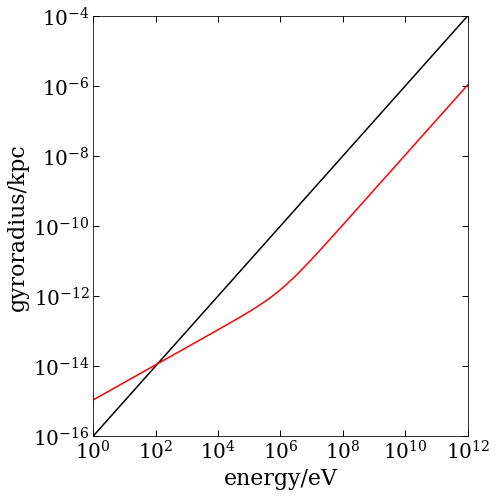

In [10]:
plt.figure(figsize = (7,7))
plt.plot(ene, gyro, 'k')
plt.plot(ene, gyro1, 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy/eV',fontsize=22)
plt.ylabel('gyroradius/kpc',fontsize=22)
plt.show()

In [11]:


def rect_prop(energy, losstime):
    """
    returns rectilinear propagation distance of a particle with kinetic energy 'energy'
    which loses its kinetic energy in time 'losstime/yrs' (see graph above) in kpc"""
    return usr.rel_bet(1E9, 511E3)*3E10*(losstime*yrs)*kpc

#rectilinear propagation distance
print('rectilinear prop = ', rect_prop(1E6, 1E5), 'kpc')
print('gyrorad = ', gyro_gen(1E6, 511E3, 1, 1), 'kpc')


#Their propagation will be limited by magentic fields. For a random walk, based on Boehm+2008. 
def d_ran(energy, losstime):
    """distance covered in kpc by a particle taking a random walk where 'energy'  is the energy
    of the particle and 'losstime' is the time it takes to lose all its energy in yrs. Assumes charge
    on particle is 1 and magnetic field is 1 microgauss"""
    gyro = gyro_gen(energy, 511E3, 1, 1)
    d_rect = rect_prop(energy, losstime)
    return np.sqrt(gyro*d_rect)

d_ran_1 = d_ran(1E9, 1E8)

print('random walk length = ', d_ran_1*1000, 'pc')

rectilinear prop =  30.66036742505428 kpc
gyrorad =  1.5207368351225806e-12 kpc
random walk length =  5.727714048247882 pc
